# 二項分布の性質

In [1]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
set_plot_params()
name = Path().cwd().name + "/binomial"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


# PMF

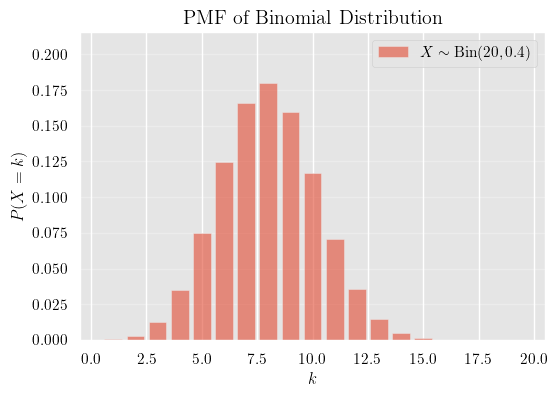

In [6]:
from math import comb

# 二項分布 Bin(n, p)
n, p = 20, 0.4

# 離散値
k = np.arange(0, n + 1)
pmf = np.array([comb(n, ki) * (p**ki) * ((1 - p)**(n - ki)) for ki in k])

# プロット
plt.figure(figsize=(6,4))
plt.bar(k, pmf, width=0.8, alpha=0.6, label=rf"$X \sim \mathrm{{Bin}}({n},{p})$")
# plt.vlines(k, 0, pmf, colors="blue", lw=1)

plt.title("PMF of Binomial Distribution")
plt.xlabel(r"$k$")
plt.ylabel(r"$P(X=k)$")
plt.xlim(-0.5, n + 0.5)
plt.ylim(0, pmf.max() * 1.2)
plt.grid(True, axis="y", alpha=0.3)
plt.legend()
plt.savefig(save_dir.joinpath("pmf.png"), dpi=300, bbox_inches="tight")
plt.show()


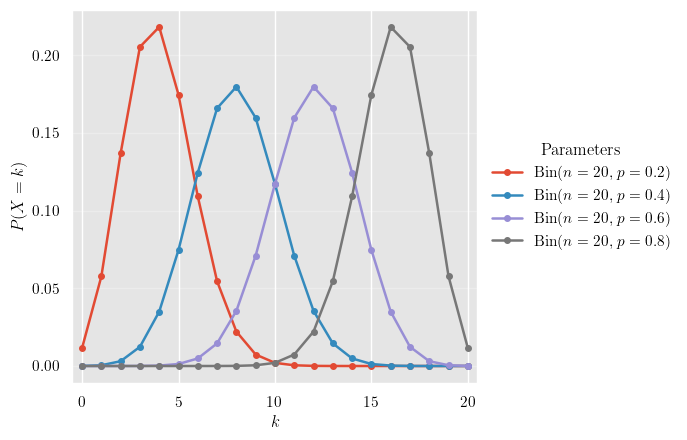

In [22]:
from math import comb

n = 20
ps = [0.2, 0.4, 0.6, 0.8]
k = np.arange(0, n + 1)

def binom_pmf(n, p, k):
    return np.array([comb(n, ki) * (p**ki) * ((1 - p)**(n - ki)) for ki in k])

fig, ax = plt.subplots(figsize=(7, 4.5))
for p in ps:
    pmf = binom_pmf(n, p, k)
    ax.plot(k, pmf, marker="o", ms=4, lw=1.8, label=rf"$\mathrm{{Bin}}(n={n},\,p={p:.1f})$")

ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$P(X=k)$")
ax.set_xlim(-0.5, n + 0.5)
ax.grid(True, axis="y", alpha=0.3)

# 右外に凡例。保存時に切れないよう余白確保
# 方法1: bbox_to_anchor + tight
leg = ax.legend(loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0, frameon=False, title="Parameters")
fig.tight_layout()
fig.savefig(save_dir.joinpath("pmf_multi_line.png"), dpi=300, bbox_inches="tight")

# 代替方法（コメント解除で使用）:
# 方法2: 右余白を先に空ける
# fig.subplots_adjust(right=0.79)
# ax.legend(loc="center left", bbox_to_anchor=(1.0, 0.5), frameon=False, title="Parameters")
# fig.savefig(save_dir.joinpath("pmf_multi_line.png"), dpi=300)


In [2]:
from matplotlib.animation import FuncAnimation, PillowWriter
from math import comb

# 二項分布 Bin(n, p) の PMF を p を変えながら可視化（折れ線＋マーカー）
n = 20
k = np.arange(0, n + 1)

def pmf_binom(n, p):
    return np.array([comb(n, ki) * (p**ki) * ((1 - p)**(n - ki)) for ki in k])

fig, ax = plt.subplots(figsize=(6, 4))
(line,) = ax.plot([], [], marker="o", ms=4, lw=1.8, color="C0")
ax.set_xlim(-0.5, n + 0.5)
ax.set_ylim(0, 0.25)  # 必要に応じて後で自動調整
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$P(X=k)$")
ax.set_title("PMF of Binomial Distribution")

def init():
    line.set_data([], [])
    ax.set_title(f"X ~ Bin(n={n}, p=?)")
    return (line,)

def update(p):
    y = pmf_binom(n, p)
    line.set_data(k, y)
    ax.set_ylim(0, 0.5)
    ax.set_title(f"X ~ Bin(n={n}, p={p:.2f})")
    return (line,)

frames = np.linspace(0.05, 0.95, 40)
ani = FuncAnimation(fig, update, frames=frames, init_func=init, blit=False, interval=200)

# GIFに保存
ani.save(save_dir.joinpath("pmf_line.gif"), writer=PillowWriter(fps=5))
plt.close()


In [8]:
# 固定 p、n を増やす
p = 0.4
n_min, n_max = 5, 60
Ns = np.arange(n_min, n_max + 1)

# 最大 n に合わせてバー本数を固定
k_max = n_max
k = np.arange(0, k_max + 1)

def binom_pmf(n, p):
    y = np.zeros_like(k, dtype=float)
    for ki in range(n + 1):
        y[ki] = comb(n, ki) * (p**ki) * ((1 - p)**(n - ki))
    return y

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(k, np.zeros_like(k, dtype=float), width=0.8, color="C0", alpha=0.65)
ax.set_xlim(-0.5, k_max + 0.5)
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$P(X=k)$")
ax.set_title("PMF of Binomial Distribution")

def init():
    for b in bars:
        b.set_height(0.0)
        b.set_visible(False)
    ax.set_title(rf"$X \sim \mathrm{{Bin}}(n,\,{p:.2f})$")
    ax.set_ylim(0, 0.3)
    return bars

def update(n):
    y = binom_pmf(n, p)

    # 可視バーの切り替えと高さ更新
    for i, b in enumerate(bars):
        if i <= n:
            b.set_visible(True)
            b.set_height(y[i])
        else:
            b.set_visible(False)
            b.set_height(0.0)

    # y軸は都度調整（少し余裕を持たせる）
    ax.set_ylim(0, max(0.05, y.max() * 1.15))

    ax.set_title(rf"$X \sim \mathrm{{Bin}}({n},\,{p:.2f})$")
    return bars

ani = FuncAnimation(fig, update, frames=Ns, init_func=init, blit=False, interval=200)

# GIF 保存
ani.save(save_dir.joinpath("pmf_n_increase.gif"), writer=PillowWriter(fps=5))
plt.close()


In [20]:
from matplotlib.animation import FuncAnimation, PillowWriter
from math import comb, sqrt, pi

# LaTeX無効化（Unicode μ, σ で落ちないように）
# mpl.rcParams["text.usetex"] = False

# 設定
p = 0.4
n_min, n_max = 10, 50
Ns = np.arange(n_min, n_max + 1)

# 軸とデータ域
k_max = n_max
k_all = np.arange(0, k_max + 1)
x_cont = np.linspace(-0.5, k_max + 0.5, 2000)

def binom_pmf_all(n, p):
    """k=0..k_max までの PMF。k>n は NaN にして線を切る。"""
    y = np.full_like(k_all, np.nan, dtype=float)
    for ki in range(n + 1):
        y[ki] = comb(n, ki) * (p**ki) * ((1 - p)**(n - ki))
    return y

def normal_pdf(x, mu, sigma):
    return (1.0 / (sigma * np.sqrt(2.0 * pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# 図
fig, ax = plt.subplots(figsize=(6, 4))
# 二項は折れ線＋マーカー
(line_bin,) = ax.plot([], [], lw=1.8, marker="o", ms=4, alpha=0.9, label="Binomial")
# 正規は滑らかな曲線（1ビン幅×PDF）
(line_norm,) = ax.plot([], [], lw=1, alpha=0.5, label="Normal")

ax.set_xlim(-0.5, k_max + 0.5)
ax.set_xlabel(r"$k$")
ax.set_ylabel(r"$P(X=k)$")
ax.grid(True, axis="y", alpha=0.3)
ax.legend(loc="upper right")

def init():
    line_bin.set_data([], [])
    line_norm.set_data([], [])
    ax.set_ylim(0, 0.3)
    ax.set_title("Binomial → Normal approximation")
    return line_bin, line_norm

def update(n):
    # 二項 PMF（折れ線）
    y_bin = binom_pmf_all(n, p)
    line_bin.set_data(k_all, y_bin)

    # 正規近似（滑らか）
    mu, sigma = n * p, sqrt(n * p * (1 - p))
    y_norm = normal_pdf(x_cont, mu, sigma) * 1.0  # bin幅=1 に合わせる
    line_norm.set_data(x_cont, y_norm)

    # y軸調整
    ymax = np.nanmax(y_bin)
    ymax = max(ymax, y_norm.max())
    ax.set_ylim(0, 0.25)

    # タイトルは mathtext を使用（ASCII のみ）
    ax.set_title(rf"$X \sim \mathrm{{Bin}}(n={n},\,p={p:.2f});\ \mu={mu:.1f},\ \sigma={sigma:.2f}$")
    return line_bin, line_norm

ani = FuncAnimation(fig, update, frames=Ns, init_func=init, blit=False, interval=120)
ani.save(save_dir.joinpath("binom_to_normal_line.gif"), writer=PillowWriter(fps=5))
plt.close()


# CDF

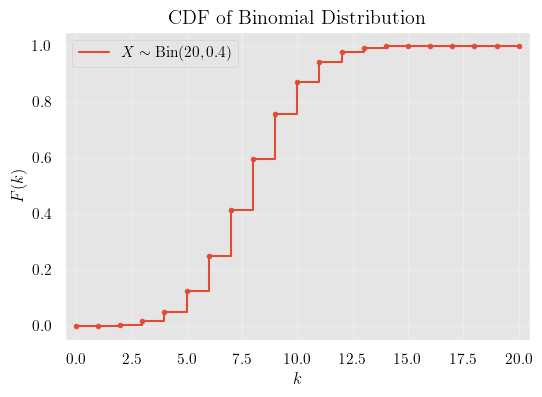

In [4]:
# 二項分布 Bin(n, p)
n, p = 20, 0.4

# 離散点とPMF
k = np.arange(0, n + 1)
pmf = np.array([comb(n, ki) * (p**ki) * ((1 - p)**(n - ki)) for ki in k])

# 累積分布関数（ステップ）
cdf = np.cumsum(pmf)

plt.figure(figsize=(6, 4))
plt.step(k, cdf, where="post", label=rf"$X \sim \mathrm{{Bin}}({n},{p})$")
plt.scatter(k, cdf, s=12)  # 端点を可視化

plt.title("CDF of Binomial Distribution")
plt.xlabel(r"$k$")
plt.ylabel(r"$F(k)$")
plt.xlim(-0.5, n + 0.5)
plt.ylim(-0.05, 1.05)
plt.grid(True, axis="both", alpha=0.3)
plt.legend()
plt.savefig(save_dir.joinpath("cdf.png"), dpi=300, bbox_inches="tight")
plt.show()
